In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
A = pd.read_csv('matrix_motif_vs_651cell_intensity_2017dec13.txt', sep='\t')

In [4]:
A.shape

(5722, 652)

In [5]:
A.head()

,motif,LN10000_DS18406_vHMEC,LN10007_DS18590_Skin_Melanocytes,LN10008_DS18692_Skin_Keratinocytes,LN10011_DS20753_Pancreas,LN10012_DS20827_Ovary,LN10036_DS15153_iPS_19_11,LN10039_DS20383_Heart,LN10043_DS21042_MSC,LN10048_DS20260_Stomach_Mucosa,...,LN4874_DS20647_LHCN_M2_D4,LN4879_DS20671_MSC,LN4899_DS20770_Small_Intestine_Mucosa,LN4901_DS20780_fBrain,LN4903_DS20789_fMuscle_back,LN4906_DS20797_fMuscle_leg,LN4930_DS20904_RPMI_7951,LN4936_DS20951_fKidney_R,LN4938_DS20956_fSpinal_cord,LN4998_DS21417_SKNDZ
0,ALX3_homeodomain_1,-0.001493,-0.003118,0.001075,-0.005758,0.002414,-0.000351,0.007227,0.000301,0.01270,...,0.002692,-0.012730,0.003513,0.020222,-1.000000e-07,0.003349,-7.492200e-03,0.004036,0.008930,0.005975
1,ALX3_homeodomain_2,-0.000373,-0.002079,0.003226,-0.008637,-0.002414,0.000350,0.021681,0.000602,0.01016,...,0.005384,-0.012730,0.001952,0.011555,3.444000e-03,0.003349,-2.497400e-03,0.008073,0.008930,0.014937
2,ALX3_homeodomain_3,-0.004851,-0.006236,-0.002151,-0.014395,-0.002414,-0.016466,0.000000,-0.000602,-0.00254,...,0.002692,-0.006365,-0.001171,0.000000,-1.377640e-02,-0.016744,-9.989600e-03,-0.008073,-0.013396,0.029874
3,ALX4_EOMES_Homeo_Tbox_1,0.003358,0.005197,0.008065,-0.005758,0.007243,0.007357,0.010841,0.007223,0.02286,...,0.018845,-0.003182,0.003903,0.011555,1.722000e-02,0.010046,-1.000000e-07,0.004036,0.008930,0.011950
4,ALX4_TBX21_Homeo_Tbox_2,0.005971,0.007795,0.008064,0.002879,0.004829,0.011561,0.032522,0.004514,0.01524,...,0.024230,0.000000,0.007026,0.017333,6.888000e-03,0.013395,0.000000e+00,0.008073,0.000000,0.011950


In [6]:
motifnames = A.values[:,0]

In [7]:
motifXsample = A.values[:,1:]

In [8]:
Basis = np.load('2017-09-25NMF_Ncomps16Basis.npy')

In [9]:
Basis.shape

(651, 16)

In [10]:
from datetime import date
from sklearn.decomposition import NMF, non_negative_factorization

today = str(date.today())


In [11]:
motifXsample.shape

(5722, 651)

# look at distribution of all motif means

In [12]:
np.mean(motifXsample, axis=1)

array([0.004665945792797411, 0.005689032462877622, -0.003758964669738866,
       ..., 0.018768896159754238, 0.013001861290322575,
       0.013662053370882417], dtype=object)

In [13]:
import matplotlib.pyplot as plt

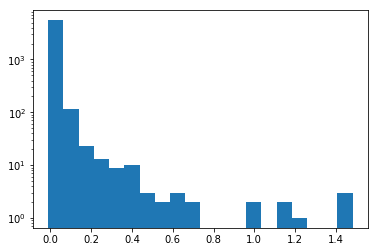

In [14]:
plt.clf()
plt.hist(np.mean(motifXsample, axis=1), bins=20)
plt.yscale('log')
plt.show()

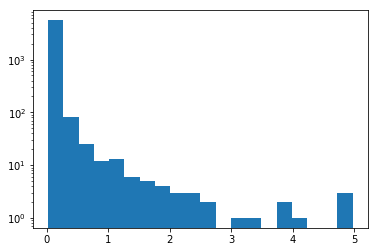

In [15]:
plt.clf()
plt.hist(np.max(motifXsample, axis=1), bins=20)
plt.yscale('log')
plt.show()

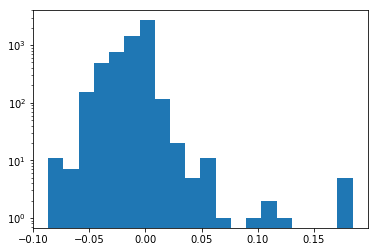

In [16]:
plt.clf()
plt.hist(np.min(motifXsample, axis=1), bins=20)
plt.yscale('log')
plt.show()

In [17]:
len(motifXsample.flatten())

3725022

# set all < 0 to 0 (can change this to be mean as well opr something)

In [18]:
motifXsample[motifXsample<0] = 0

In [19]:
(motifXsample.T > np.mean(motifXsample, axis=1)).T

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False, False,  True],
       ..., 
       [False, False, False, ...,  True, False,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [20]:
len(motifXsample[(motifXsample.T > np.median(motifXsample, axis=1)).T])

1798936

In [21]:
motifXsample[:,0]

array([0, 0, 0, ..., 0.010075399999999998, 0.0074633, 0.008209600000000001], dtype=object)

In [22]:
len(motifXsample.flatten()[motifXsample.flatten()>0])

2899140

### this is how I would get the sparser version


In [23]:
def make_stacked_bar_plot(Ncomps, Nrelevant, BarMatrix, bargraph_out, names = [], plotClusterMode=False, barsortorder=[], clusterTopLabels=[], colormode='newSasha'):
    if len(barsortorder)<1:
        barsortorder = np.arange(Nrelevant)
        print('inventing barsortorder')
    if len(names) < 1:
        print('inventing names')
        names = [str(i) for i in range(Nrelevant)]
        names = np.array(names)
    ttt = np.arange(Nrelevant)
    start = 0
    end = Nrelevant
    ground_pSample = ttt*0
    Comp_colors = define_colorsA(Ncomps, mode=colormode)
    plt.clf()
    plt.figure(figsize=(150,40))
    plt.bar(ttt[start:end], BarMatrix[0,start:end][barsortorder], color=Comp_colors[0],
             bottom=ground_pSample[start:end], alpha=0.75)
    ground_pSample = BarMatrix[0,start:end][barsortorder]
    for i in range(1,Ncomps):
        plt.bar(ttt[start:end],BarMatrix[i,start:end][barsortorder], bottom = ground_pSample, color=Comp_colors[i], alpha=0.75)
        ground_pSample = np.sum(BarMatrix[0: i+1,start:end], axis=0)[barsortorder]
    increase_axis_fontsize()
    plt.ylabel('sum of signal in matrix',fontsize=70)
    #plt.title('Full Sample',fontsize=70)
    samplenamesize = 11
    samplenamesize = (1/Nrelevant)**0.5 * 300
    #thebottom = 0.15
    thebottom = min([(1/Nrelevant)**0.3 * 1.2, 0.3])
    if(plotClusterMode):
        plt.xticks(ttt, ttt.astype(str), rotation='vertical', fontsize=samplenamesize)
        if len(clusterTopLabels) > 0:
            ax = plt.gca()
            ax2 = ax.twiny()
            ax2.set_xticks(ttt)
            ax2.set_xticklabels(clusterTopLabels.astype(str), rotation=90, fontsize=samplenamesize)
            #ax.xaxis.tick_top()
            #plt.xticks(ttt, clusterTopLabels.astype(str), rotation='vertical', fontsize=samplenamesize)
    else:
        plt.xticks(ttt, names[barsortorder], rotation='vertical', fontsize=samplenamesize)	
    plot_margin = 5
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=thebottom)
    plt.savefig(bargraph_out)
    plt.close()	
    


def define_colorsA(Ncomps, mode='newSasha'):
    if (mode=='newSasha'):
        Comp_colors = ['#A6CEE3','#1f78b4','#b2df8a','#33a02c','#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#ffd700', '#AAAAAA', '#C52892', '#00bbbb']
    elif (mode=='Sasha'):
        Comp_colors = ['red', 'tan', 'lime','blue','m','k','c', 'coral', 'indigo','darkgreen','orange','grey','gold', 'lightskyblue', 'peru', 'olive']
    else:
        Comp_colors = ["#A6CEE3", "#438EC0", "#63A8A0", "#98D277", "#3BA432", "#B89B74", "#F16667", "#E62F27", "#F9A963", "#FE982C", "#ED8F47", "#C3AAD2", "#7D54A5","#B9A499", "#EAD27A" ,"#B15928"]
        #wouter colors
    if (Ncomps>16):
        np.random.seed(666)
        from matplotlib import colors as mcolors
        colornames = list(mcolors.CSS4_COLORS.keys())
        count = 16
        while (count < Ncomps):
            newcolor = colornames[np.random.randint(0,len(colornames))]
            trialcount = 0
            while ((newcolor in Comp_colors) and (trialcount < 100)):
                newcolor = colornames[np.random.randint(0,len(colornames))]
                trialcount+=1
            Comp_colors.append(newcolor)
            count+=1
    return Comp_colors

In [24]:
from OONMFhelpers import *

/Users/amuratov/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Now lets do the version with mean subtracted out

In [25]:
motifXsample_slim = motifXsample * (motifXsample.T > np.mean(motifXsample, axis=1)).T

In [26]:
W, H, n_iter = non_negative_factorization(motifXsample_slim, n_components=16, init='custom', random_state=1, update_H=False, H=Basis.T, tol=1e-7, verbose=1)


violation: 1.0
violation: 0.36286356033860856
violation: 0.03319727092883445
violation: 0.010307142455030529
violation: 0.00248367772659381
violation: 0.0005424078688980233
violation: 0.00012182406060251945
violation: 3.236116089462675e-05
violation: 8.429626838274053e-06
violation: 2.178900480375103e-06
violation: 5.898153509531914e-07
violation: 1.7042875009390908e-07
violation: 5.1055536246634555e-08
Converged at iteration 13


In [29]:
Wnormed = (W.T / np.sum(W, axis=1)).T

In [39]:
for i in range (58):
    nrelevant = 100
    if ((i+1)*100 > len(Wnormed)):
        nrelevant =  len(Wnormed) - i*100
        print('doing last ',nrelevant)
    make_stacked_bar_plot(16, nrelevant, Wnormed[i*100:(i+1)*100].T, 'Slim_strata'+str(i+1)+'Motifs.pdf', names = motifnames[i*100:(i+1)*100])

inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing barsortorder
inventing b

In [28]:
today=get_today()

In [33]:
np.save(today+'MotifXComponents_slim_tol7.npy', W)

In [32]:
np.save(today+'MotifXComponentsNormed_slim_tol7.npy', Wnormed)